In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Understanding & Preparation

## Data Semantics
 • Introduce the variables with their meaning and characteristics;

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


It's analyzed a dataset about films and tv series. There are 23 variables:
- originalTitle: 		Original title, in the original language.
- runtimeMinutes: 		Primary runtime of the title, in minutes.
- isAdult: 			Whether or not the title is for adult. 0: non-adult title; 1: adult title.
- startYear: 			Represents the release year of a title. In the case of TV Series, it is the series start year.
- endYear: 			TV Series end year.
- numVotes: 			Number of votes the title has received.
- numRegions: 	 		The regions number for this version of the title.
- worstRating: 			Worst title rating.
- bestRating: 			Best title rating.
- canHaveEpisodes:		Whether or not the title can have episodes.
- isRatable: 			Whether or not the title can be rated by users.
- totalImages:			Total Number of Images for the title within the IMDb title page.
- totalVideos: 			Total Number of Videos for the title within the IMDb title page.
- totalCredits:			Total Number of Credits for the title.
- criticReviewsTotal:		Total Number of Critic Reviews.
- awardWins:			Number of awards the title won.
- awardNominationsExcludeWins: 	Number of award nominations excluding wins.
- titleType:			The type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
- rating:			IMDB title rating class.
- ratingCount: 			The total number of user ratings submitted for the title.
- countryOfOrigin: 		The country where the title was primarily produced.
- genres: 			The genre(s) associated with the title (e.g., drama, comedy, action).
- userReviewsTotal  		Total Number of Users Reviews.

We've chosen the following variables: (non le sceglierei da qua le variabili)


*   numVotes
*   awardWins
*   rating
*   numRegions


### Type delle variabili

In [4]:
df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                         object
runtimeMinutes                  object
awardWins                      float64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                          int64
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
dtype: object

Analyzing the variables it can be seen that there are 4 types of variables:
- object
- integers(int64)
- floats (float64)
- booleans (bool)

It's noted that endYear is tipe object and it should be int64, award wins should be int

In [5]:
#le variabili sono state trasformate in float e non in int a causa dei valori mancanti del dataframe, che non possono essere convertiti in int
#i valori non convertibili vengono sostituiti con NaN, che è un valore di tipo float

df['endYear'] = pd.to_numeric(df['endYear'], errors='coerce')
df['awardWins'] = pd.to_numeric(df['awardWins'], errors='coerce')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df['isAdult'] = df['isAdult'].astype(bool)

df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                        float64
runtimeMinutes                 float64
awardWins                      float64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                           bool
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
dtype: object

### Missing Value

In [6]:
df_copy = df.copy()

In [7]:
df_copy.isna().sum()

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                       2618
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                             0
dtype: int64

In [8]:
def variable_cleaner (variable_chosen):
    df_copy[variable_chosen] = df_copy[variable_chosen].replace('\\N', np.nan)

# Filtra i titoli con runtimeMinutes uguale a NaN
    prova = df_copy.loc[df_copy[variable_chosen].isna()]

for c in df_copy.columns:
    variable_cleaner(c)

    
df_copy.isna().sum()


originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                       2618
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                           382
dtype: int64

In [9]:
df_copy['runtimeMinutes']

0          NaN
1          NaN
2          NaN
3          NaN
4         80.0
         ...  
16426      NaN
16427      NaN
16428    140.0
16429      NaN
16430      NaN
Name: runtimeMinutes, Length: 16431, dtype: float64

In [10]:
def fill_na_with_mean(df_copy, column, group_by):
    df_copy[column] = pd.to_numeric(df_copy[column], errors='coerce')  # Assicura che la colonna sia numerica
    df_copy[column] = df_copy[column].fillna(df_copy.groupby(group_by)[column].transform('mean'))
    return df_copy

# Riempie i valori NaN in 'runtimeMinutes' con la media dei runtime minutes divisi per 'titleType'
df_copy = fill_na_with_mean(df_copy, 'runtimeMinutes', 'titleType')

df_copy['runtimeMinutes']

0         40.332301
1         28.000000
2         92.994200
3         53.573677
4         80.000000
            ...    
16426     92.994200
16427     92.994200
16428    140.000000
16429     92.994200
16430     13.580867
Name: runtimeMinutes, Length: 16431, dtype: float64

In [11]:
df_copy['runtimeMinutes']

0         40.332301
1         28.000000
2         92.994200
3         53.573677
4         80.000000
            ...    
16426     92.994200
16427     92.994200
16428    140.000000
16429     92.994200
16430     13.580867
Name: runtimeMinutes, Length: 16431, dtype: float64

## Distribution of the variables and statistics
• Explore (single, pairs of…) variables quantitatively (e.g., statistics, distributions);

In [12]:
numeric_df = df.select_dtypes(include=[np.number])

# Calcolare le statistiche descrittive
desc = numeric_df.describe().round(2)

# Calcolare il Coefficiente di Variazione (CV)
cv = (numeric_df.std() / numeric_df.mean()).round(2)
cv_df = pd.DataFrame(cv).T
cv_df.index = ['CV']

# Aggiungere il CV alle statistiche descrittive
desc = pd.concat([desc, cv_df])

desc

,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,numRegions,userReviewsTotal,ratingCount
count,16431.00,814.00,11579.00,13813.00,16431.00,16431.0,16431.0,16431.00,16431.00,16431.00,16431.00,16431.00,16431.00,16431.00,16431.00
mean,1991.87,2001.57,61.22,0.49,1492.15,1.0,10.0,11.48,0.27,61.34,2.79,0.56,3.55,7.23,1492.92
std,26.12,18.45,52.11,2.97,20137.71,0.0,0.0,74.25,3.12,174.02,15.41,3.96,5.85,66.50,20145.39
min,1878.00,1945.00,0.00,0.00,5.00,1.0,10.0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00
25%,1978.00,1989.00,25.00,0.00,15.00,1.0,10.0,1.00,0.00,16.00,0.00,0.00,1.00,0.00,15.00
50%,1997.00,2005.50,58.00,0.00,36.00,1.0,10.0,1.00,0.00,34.00,0.00,0.00,1.00,0.00,36.00
75%,2013.00,2018.00,90.00,0.00,148.50,1.0,10.0,6.00,0.00,65.00,1.00,0.00,3.00,2.00,149.00
max,2024.00,2025.00,3000.00,145.00,966565.00,1.0,10.0,3504.00,258.00,15742.00,533.00,197.00,69.00,5727.00,967042.00
CV,0.01,0.01,0.85,6.05,13.50,0.0,0.0,6.47,11.47,2.84,5.53,7.08,1.65,9.20,13.49


From the general statistics it's see that for awardWins the mean is 0.49 while the median is 0. It's highlighted that at least the 75% of units never won an award as it can be see from the value of the third quartile.  
This attribute has a low std, meaning that data are distributed near the mean.  
  
For the numVotes the average is far from the median and also from the third quartile, so there are many title with a low number of votes and some units with a lot of ratings.  
In this case, there is a very high variability, the data are distributed far from the mean.  
  
Instead, for totalCredits the mean is a bit far from the median and 75% of the title have at least 65 credits.  
The value of std is high, so the data points are widely spread out from the mean. 
  
For the total of critic and user reviews it can be see that as before the median is 0 while the mean have an higher value, so at least 50% of the films have 0 reviews. The user reviews have in mean an higher value than critic ones.  
For the first features the data are distributed near the mean more than the second features where std has a high value.  
  
The statistics of ratingCount have very similar values to numVotes. These two variables differ by a few data points.

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Creazione dei sottoplot con meno distanza
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('awardWins', 'totalCredits', 'numVotes', 'criticReviewsTotal'),
    vertical_spacing=0.1,  # Riduce la distanza verticale
    horizontal_spacing=0.1  # Riduce la distanza orizzontale
)

# Grafico per awardWins
fig.add_trace(go.Histogram(x=df['awardWins'], nbinsx=int(50/0.9)), row=1, col=1)

# Grafico per totalCredits
fig.add_trace(go.Histogram(x=df['totalCredits'], nbinsx=int(400/2)), row=1, col=2)

# Grafico per numVotes
fig.add_trace(go.Histogram(x=df['numVotes'], nbinsx=int(400/2)), row=2, col=1)

# Grafico per criticReviewsTotal con limite sull'asse y
fig.add_trace(go.Histogram(x=df['criticReviewsTotal'], nbinsx=int(400/5)), row=2, col=2)

# Aggiornamento del layout
fig.update_layout(showlegend=False, title_text="Histograms of awardWins, totalCredits, numVotes and criticReviewsTotal", height=800)

# Mostra il grafico
fig.show()

In these graphs it is analyzed the frequences of awardWins, totalCredits, numVotes and criticReviewsTotal. Due to the high frequences of the data and the range, in some cases, the distribution of the data is not clear enough.  
There is a need to trasform the data for a better analysis.

In [14]:
primo_large = df['originalTitle'].loc[df['numVotes'] == 966565]
secondo_Nlarge = df['numVotes'].nlargest(2).iloc[-1]
secondo_large = df['originalTitle'].loc[df['numVotes'] == secondo_Nlarge]
terzo_Nlarge = df['numVotes'].nlargest(3).iloc[-1]
terzo_large = df['originalTitle'].loc[df['numVotes'] == terzo_Nlarge]
print(primo_large, 966565)
print(secondo_large, secondo_Nlarge)
print(terzo_large, terzo_Nlarge)

3655    Harry Potter and the Deathly Hallows - Part 2
Name: originalTitle, dtype: object 966565
988    Il buono, il brutto, il cattivo
Name: originalTitle, dtype: object 825934
1694    Full Metal Jacket
Name: originalTitle, dtype: object 803146


From the output code it is noticed that the first 3 units for number of votes belong to the category 'movies' of the variable 'titleType'.
These are respectively:
1. Harry Potter and the Deathly Hallows - Part 2 with 966.565 votes.
2. Il buono, il brutto, il cattivo with 825.934 votes.
3. Full Metal Jacket with 803.146 votes.

In [15]:
import plotly.express as px

# Raggruppa per titleType e isAdult e somma i premi vinti
df_grouped = df.groupby(['titleType', 'isAdult'])['awardWins'].sum().reset_index()

# Ordina il DataFrame per awardWins in ordine decrescente
df_grouped = df_grouped.sort_values(by='awardWins', ascending=False)

# Crea un bar plot usando Plotly
fig = px.bar(df_grouped, x='titleType', y='awardWins', color='isAdult', barmode='group',
             title='Sum of Award Wins by Title Type and isAdult')

# Mostra il grafico
fig.show()

C:\Users\alban\AppData\Local\Temp\ipykernel_26432\1697743428.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




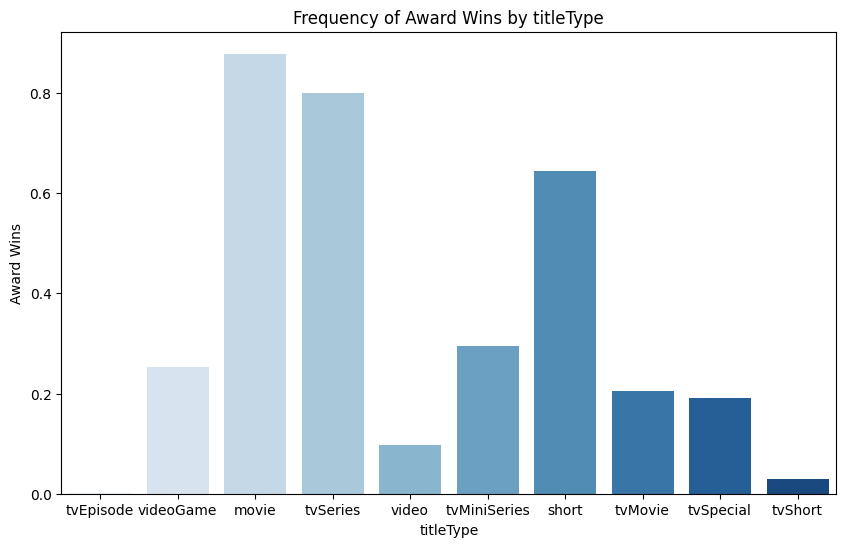

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='titleType', y='awardWins', palette='Blues', errorbar = None)

# Add title and labels
plt.title('Frequency of Award Wins by titleType')
plt.xlabel('titleType')
plt.ylabel('Award Wins')

# Show the plot
plt.show()

## Assessing data quality
• Are present errors, outliers, missing values, semantic inconsistencies, etc?

The '\N' values in the variables are replaced with NaN values, so that they can be counted as missing values.

There are:
- 2.618 missing values in the variable 'awardWins'
- 4.852 missing values in the variable 'runtimeMinutes'
- 15.617 missing values in the variable 'endYear'
- 382 missing values in the variable 'genres'

For the missing value from runtimeMinutes substitude them with the average runtime minutes grouped by titleType

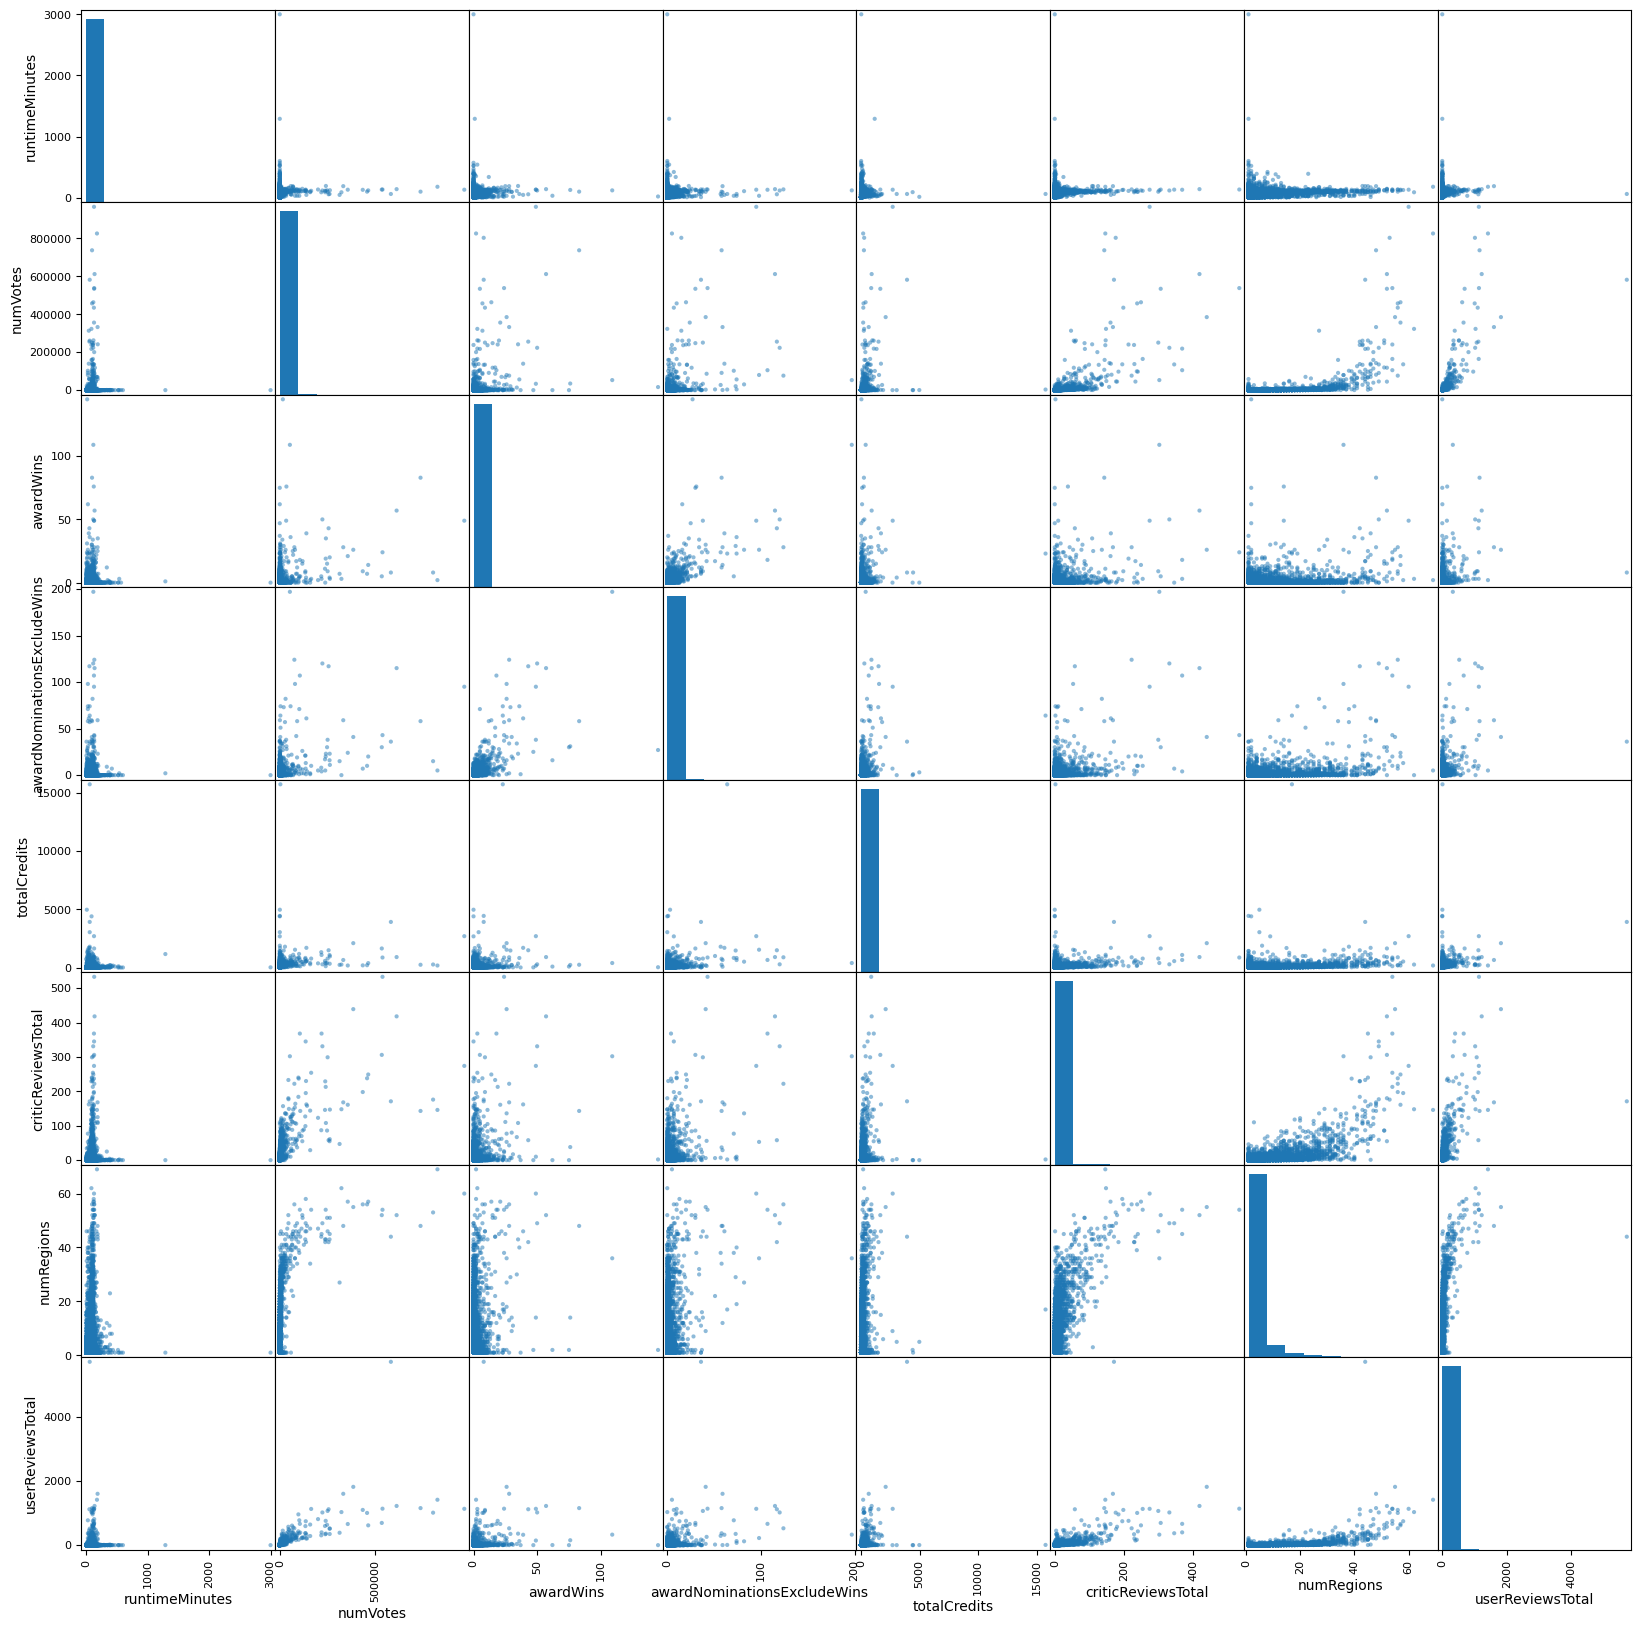

In [17]:
pd.plotting.scatter_matrix(df[['runtimeMinutes', 'numVotes', 'awardWins', 'awardNominationsExcludeWins', 'totalCredits','criticReviewsTotal', 'numRegions', 'userReviewsTotal']], figsize=(20, 20))
plt.show()

## Variable transformations
 • Is it better to use for further modules transformed variables (e.g., log-transformated)?

The ratings are given as a range (ten equally spaced intervals from one to ten). They have therefore been replaced with the mean of the range.

In [18]:
#function to calculate the interval mean
def interval_mean(value):
# Rimuove i caratteri '[' e ')' e divide usando ','
    estremi = value.replace('(', '').replace(']', '').split(',')
    minimo = float(estremi[0])
    massimo = float(estremi[1])
    # Calcola e restituisce la media
    return (minimo + massimo) / 2

# Applica la funzione alla colonna 'Intervallo' per ottenere la media
df['ratingMean'] = df['rating'].apply(interval_mean)

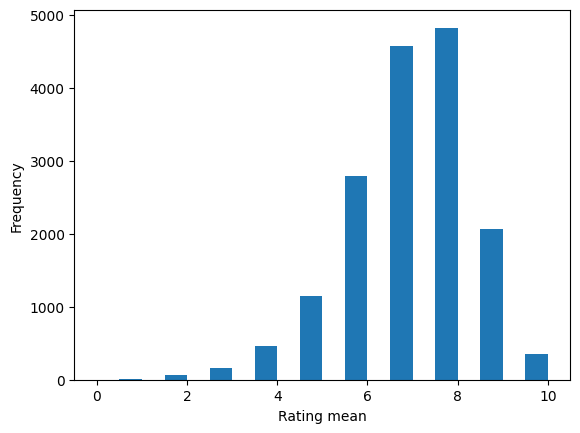

In [19]:
# Creare bin di larghezza bin_width
bin_width = 0.5
bins = np.arange(0, 10 + bin_width, bin_width)

plt.hist(df['ratingMean'], bins = bins)
plt.xlabel('Rating mean')
plt.ylabel('Frequency')
plt.show()

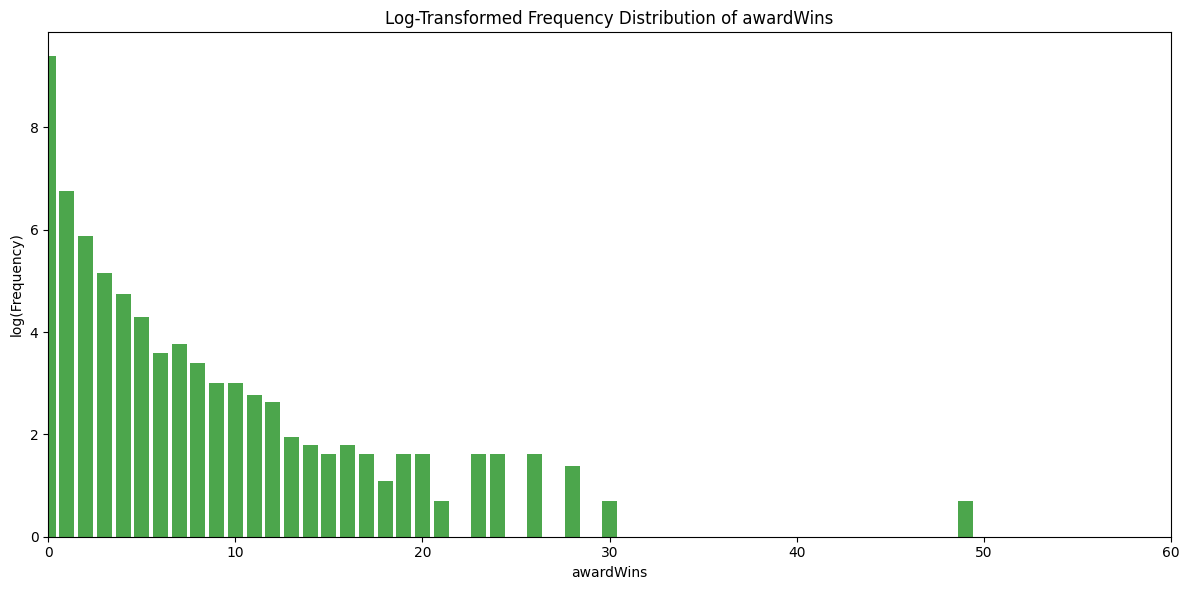

In [20]:
# Create a copy of the dataframe
df_copy = df.copy()

# Calculate the frequency of each awardWins value
frequency = df_copy['awardWins'].value_counts().sort_index()

# Apply logarithmic transformation to the frequency (adding a small constant to avoid log(0))
log_frequency = np.log(frequency + 1e-9)

# Plot the log-transformed frequency distribution
plt.figure(figsize=(12, 6))

# Log-transformed frequency distribution
plt.bar(log_frequency.index, log_frequency.values, color='green', alpha=0.7)
plt.title('Log-Transformed Frequency Distribution of awardWins')
plt.xlabel('awardWins')
plt.ylabel('log(Frequency)')
plt.xlim(0, 60)

# Show the plot
plt.tight_layout()
plt.show()

## Pairwise correlations and eventual elimination of variables
 • Matrix correlation (analyse high correlated variables)

In [21]:
df['numVotes'].corr(df['ratingCount'])

np.float64(0.9999999334405584)

The two variables 'numVotes' and 'ratingCount' represent the same attribute, so we can eliminate one of them.

In [22]:
del df['ratingCount']

In [23]:
df['isRatable'].value_counts()

isRatable
True    16431
Name: count, dtype: int64

In [24]:
df['worstRating'].value_counts()

worstRating
1    16431
Name: count, dtype: int64

In [25]:
df['bestRating'].value_counts()

bestRating
10    16431
Name: count, dtype: int64

'isRatable', 'worstRating' and 'bestRating' are attributes with all the same values for every object in the dataframe, so they are useless for our analysis.

In [26]:
del df['isRatable']

In [27]:
del df['worstRating']

In [28]:
del df['bestRating']

In [29]:
import jinja2 as tommasofumaganja
df.corr(numeric_only = True, method="pearson").style.background_gradient(cmap='Blues', vmin=-1, vmax=1)

,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingMean
startYear,1.000000,0.951679,0.001583,0.076407,0.019135,0.013880,0.059189,0.080991,0.024758,0.077200,0.128822,0.015654,-0.059845,0.019577,0.180534
endYear,0.951679,1.000000,-0.012047,0.049635,0.069107,-0.017871,0.110778,-0.053540,0.057957,0.069017,nan,0.055734,0.172886,0.131609,-0.069785
runtimeMinutes,0.001583,-0.012047,1.000000,0.072169,0.069823,0.037109,0.023990,0.053372,0.137908,0.070838,0.011360,0.093912,0.227780,0.075691,-0.129984
awardWins,0.076407,0.049635,0.072169,1.000000,0.351491,0.208862,0.178123,0.191245,0.361878,0.693788,0.026345,-0.016394,0.281677,0.281566,0.055754
numVotes,0.019135,0.069107,0.069823,0.351491,1.000000,0.244703,0.255338,0.244675,0.673351,0.432749,0.004030,-0.011618,0.454055,0.752175,0.037766
totalImages,0.013880,-0.017871,0.037109,0.208862,0.244703,1.000000,0.167539,0.342938,0.253509,0.303263,0.138943,-0.025093,0.288993,0.275474,0.025370
totalVideos,0.059189,0.110778,0.023990,0.178123,0.255338,0.167539,1.000000,0.353334,0.327225,0.315425,0.066168,-0.014218,0.247112,0.280888,0.008589
totalCredits,0.080991,-0.053540,0.053372,0.191245,0.244675,0.342938,0.353334,1.000000,0.253171,0.330074,0.156561,-0.036051,0.264634,0.305917,0.035868
criticReviewsTotal,0.024758,0.057957,0.137908,0.361878,0.673351,0.253509,0.327225,0.253171,1.000000,0.505829,-0.036630,-0.018679,0.658574,0.645238,-0.019724
awardNominationsExcludeWins,0.077200,0.069017,0.070838,0.693788,0.432749,0.303263,0.315425,0.330074,0.505829,1.000000,0.064031,-0.016178,0.373242,0.420926,0.041750


From this matrix it can be seen the correlation between each numeric variable in the dataset using the Pearson correlation method.

In [30]:
import seaborn as sns
# Se il DataFrame è molto grande, campiona un sottoinsieme più gestibile
# Imposta la dimensione del campione a un valore che il tuo sistema possa gestire, ad esempio 5 righe
df_no_boolean = df.loc[~(df['isAdult'] | df['canHaveEpisodes'])]

df_no_boolean = df_no_boolean.drop(['isAdult', 'canHaveEpisodes'], axis=1)

df_sampled = df_no_boolean.corr(numeric_only = True, method="spearman")

plt.figure(figsize=(50, 50), dpi= 300)
sns.heatmap(df_sampled, annot=True, cmap='Reds', cbar=True, annot_kws={"size": 40})

plt.title('Distance Matrix Heatmap', fontsize = 50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


# Show the plot
plt.show()

In [31]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df, x='awardWins', y='userReviewsTotal', title='Scatter Plot of Award Wins vs User Reviews Total')

# Mostra il grafico
fig.show()

In [32]:
pr_urt_max = df['originalTitle'].loc[df['userReviewsTotal'] == 5727]
se_aw_max = df['originalTitle'].loc[df['awardWins'] == 145]
tr_aw_max = df['originalTitle'].loc[df['awardWins'] == 109]
qr_aw_max = df['originalTitle'].loc[df['awardWins'] == 83]
se_aw_max, pr_urt_max, tr_aw_max, qr_aw_max

(551    No War
 Name: originalTitle, dtype: object,
 7672    The Witcher
 Name: originalTitle, dtype: object,
 1668    If Beale Street Could Talk
 Name: originalTitle, dtype: object,
 15166    Fargo
 Name: originalTitle, dtype: object)

In [33]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df, x='startYear', y='awardWins', title='Scatter Plot of Award Wins vs Start Year')

# Mostra il grafico
fig.show()

In [34]:
pr_urt_max = df['originalTitle'].loc[df['startYear'] == 1878]
pr_urt_max

15931    Le Fumeur
Name: originalTitle, dtype: object

In [35]:
df.iloc[15931]

originalTitle                        Le Fumeur
rating                                  (4, 5]
startYear                                 1878
endYear                                    NaN
runtimeMinutes                             NaN
awardWins                                  0.0
numVotes                                    32
totalImages                                  1
totalVideos                                  0
totalCredits                                 1
criticReviewsTotal                           0
titleType                                short
awardNominationsExcludeWins                  0
canHaveEpisodes                          False
isAdult                                  False
numRegions                                   1
userReviewsTotal                             0
countryOfOrigin                         ['FR']
genres                         Animation,Short
ratingMean                                 4.5
Name: 15931, dtype: object

In [36]:
df['reviewsTotal'] = df['userReviewsTotal'] + df['criticReviewsTotal']

In [37]:
df['awardNominations'] = df['awardWins'] + df['awardNominationsExcludeWins']

In [38]:
#STURGE'S RULE

def sturges_rule(df, column_name):
    n = df[column_name].dropna().shape[0]  # Conta il numero di valori non NaN nella colonna
    k = 1 + np.log2(n)
    return int(np.ceil(k))

sturges = sturges_rule(df, 'awardWins')

Idea

- Possiamo distinguere le /N in endYear dei film e le /N delle serie tv non concluse (o degli episodi tv).